In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os


from src.utils import rl_tools

d:\Disk_D\programming_software\AI\Anaconda3\envs\pettingZoo_Langchain\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


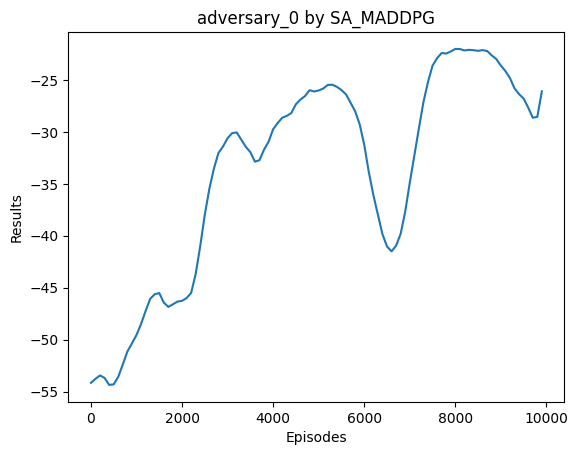

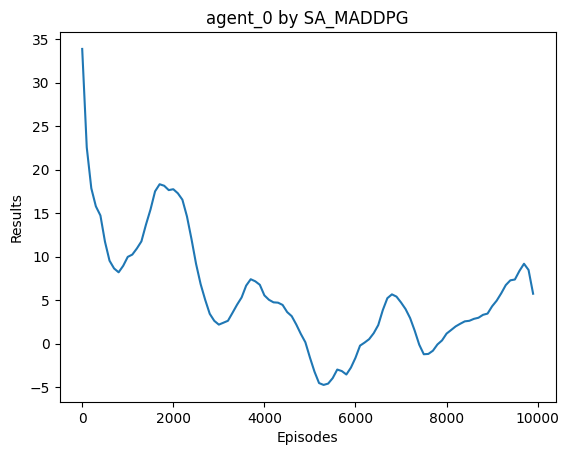

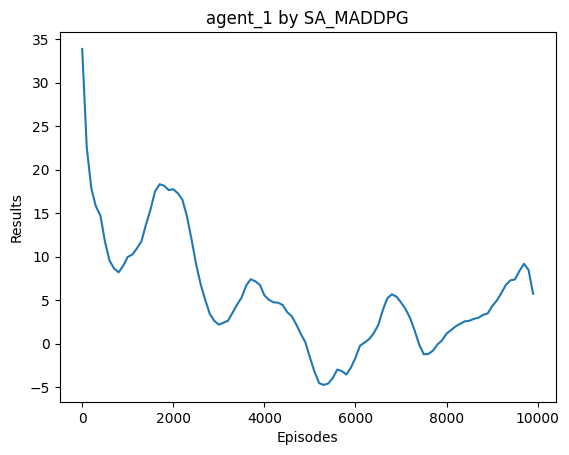

In [3]:


results_dir = '././evaluation/results/sa_maddpg'
spec_file = ''
npz_files = [os.path.join(results_dir, f) for f in os.listdir(results_dir) if f.endswith('.npz')]
latest_file = max(npz_files, key=os.path.getmtime)


results = np.load(spec_file) if spec_file else np.load(latest_file)

result_array = results['return_array']

for i, agent_name in enumerate(['adversary_0','agent_0','agent_1']):
    plt.figure()
    plt.plot(np.arange(result_array.shape[0])*100, rl_tools.moving_average(result_array[:,i],9))
    plt.xlabel("Episodes")
    plt.ylabel("Results")
    plt.title(f"{agent_name} by SA_MADDPG")

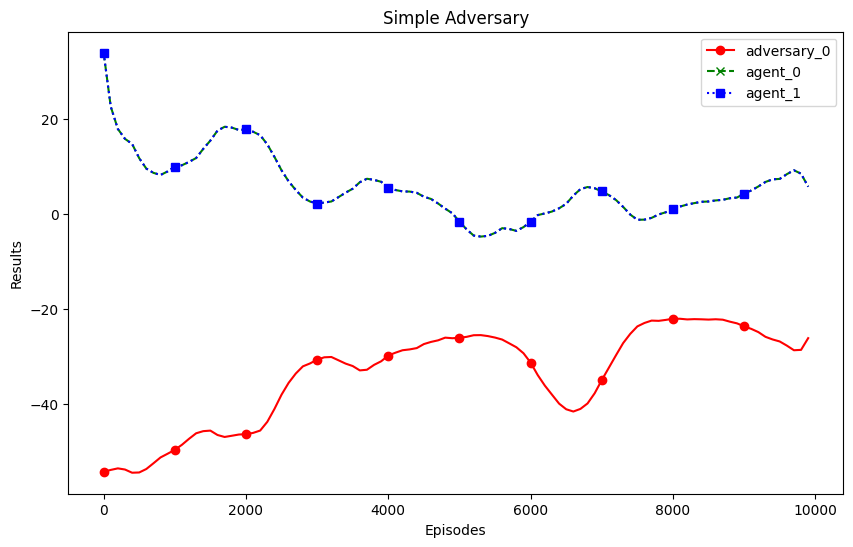

In [5]:
results_dir = '././evaluation/results/sa_maddpg'
spec_file = ''
npz_files = [os.path.join(results_dir, f) for f in os.listdir(results_dir) if f.endswith('.npz')]
latest_file = max(npz_files, key=os.path.getmtime)

results = np.load(spec_file) if spec_file else np.load(latest_file)
result_array = results['return_array']

plt.figure(figsize=(10,6))
agent_names = ['adversary_0', 'agent_0', 'agent_1']
colors = ['red', 'green', 'blue']
linestyles = ['-', '--', ':'] 
markers = ['o', 'x', 's']  

for i, agent_name in enumerate(agent_names):
    moving_avg_results = rl_tools.moving_average(result_array[:, i], 9)
    adjusted_x = np.arange(moving_avg_results.shape[0]) * 100
   
    plt.plot(adjusted_x, moving_avg_results, label=agent_name, color=colors[i], 
             linestyle=linestyles[i], marker=markers[i], markevery=10)  

plt.xlabel("Episodes")
plt.ylabel("Results")
plt.title("Simple Adversary")
plt.legend()
plt.show()

In [4]:

for i, agent_name in enumerate(['adversary_0', 'agent_0', 'agent_1']):
    print(f"{agent_name} - Min: {np.min(result_array[:, i])}, Max: {np.max(result_array[:, i])}")


adversary_0 - Min: -57.383489629654214, Max: -20.027330740820428
agent_0 - Min: -12.799335618647962, Max: 33.864793138270194
agent_1 - Min: -12.799335618647962, Max: 33.864793138270194


In [1]:
from src.utils import model_utils

weights_dir = './parameters/weights/sa_maddpg/'

subdirs = [os.path.join(weights_dir, d) for d in os.listdir(weights_dir) if os.path.isdir(os.path.join(weights_dir, d))]


dates = [d.split('/')[-1] for d in subdirs]

latest_date = max(dates)

spec_date = ''


params_date = spec_date if spec_date else latest_date

maddpg_dir = os.path.join(weights_dir, params_date)

actor_params = []
critic_params = []

actor_params = model_utils.load_params(actor_params, os.path.join(maddpg_dir,'actor'))
critic_params = model_utils.load_params(critic_params, os.path.join(maddpg_dir,'critic'))



d:\Disk_D\programming_software\AI\Anaconda3\envs\pettingZoo_Langchain\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


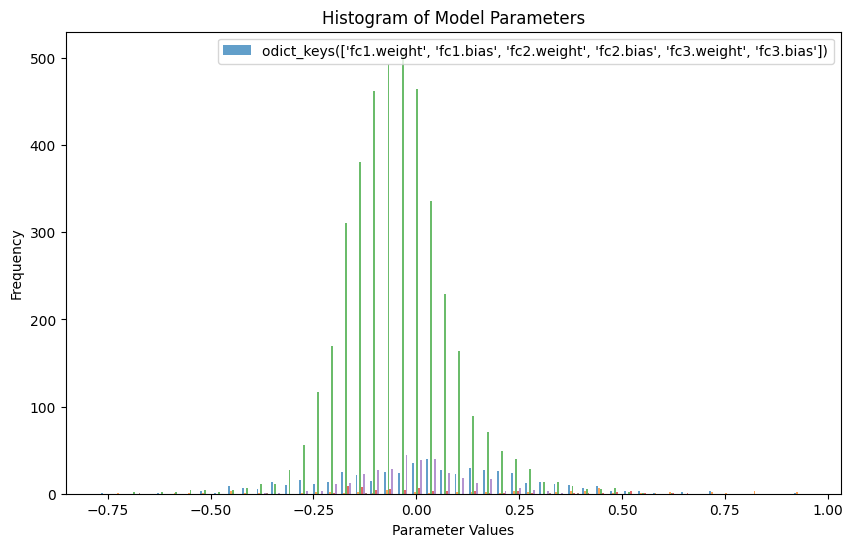

In [6]:
params = actor_params[0]

params_array = []

for param_name, param_value in params.items():
    params_array.append(param_value.cpu().numpy().flatten())

plt.figure(figsize=(10,6))
plt.hist(params_array, bins=50, alpha=0.7, label=params.keys())
plt.legend()
plt.xlabel('Parameter Values')
plt.ylabel('Frequency')
plt.title('Histogram of Model Parameters')
plt.show()